# Getting Started with Object Detection using IceVision


In [ ]:
# # Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
# !wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# # Choose your installation target: cuda11 or cuda10 or cpu
# !bash icevision_install.sh cuda11

In [ ]:
# # Restart kernel after installation
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True)

In [1]:
from icevision.all import *

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [2]:
%matplotlib inline

In [3]:
torch.cuda.empty_cache()
!export PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:256
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |
|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |
|---------------------------------------------------------------------------|
| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |
|       from large pool |       0 B  |       0 B  |       0 B  |

In [6]:
data_dir = '../../imgdata/ir4f/train'
img_dir  = '../../imgdata/ir4f/train'


In [7]:
# Create the parser
parser = parsers.VOCBBoxParser(annotations_dir=data_dir, images_dir=img_dir)

In [36]:
# Parse annotations to create records
train_records, valid_records = parser.parse()


  0%|          | 0/7 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/7 [00:00<?, ?it/s]

In [37]:
parser.class_map


<ClassMap: {'background': 0, 'Chip': 1}>

In [11]:
%matplotlib inline

In [9]:
# Transforms
# size is set to 384 because EfficientDet requires its inputs to be divisible by 128
# image_size = 384
# train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
# valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

# readme.. https://github.com/airctic/icevision/blob/master/icevision/tfms/albumentations/albumentations_helpers.py#L23
image_size = (384,8064)
train_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size)])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size)])

In [10]:
# Datasets
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [39]:
train_records[3]

BaseRecord

common: 
	- Filepath: ../../imgdata/ir4f/train/inner_rim_210805T103940.png
	- Img: None
	- Image size ImgSize(width=260, height=7990)
	- Record ID: inner_rim_210805T103940
detection: 
	- BBoxes: [<BBox (xmin:1, ymin:1349, xmax:197, ymax:1747)>]
	- Class Map: <ClassMap: {'background': 0, 'Chip': 1}>
	- Labels: [1]

In [40]:
show_sample(train_ds[3])
show_record(train_ds[3])

In [ ]:
# Show an element of the train_ds with augmentation transformations applied
samples = [train_ds[3] for _ in range(2)]
show_samples(samples, ncols=2)
show_records(samples)

In [13]:
# Just change the value of selection to try another model

selection = 2

extra_args = {}

if selection == 0:
  model_type = models.mmdet.vfnet
  backbone = model_type.backbones.resnet50_fpn_mstrain_2x

if selection == 1:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x
  # extra_args['cfg_options'] = { 
  #   'model.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.bbox_head.loss_cls.loss_weight': 0.8,
  #    }

if selection == 2:
  model_type = models.mmdet.faster_rcnn
  backbone = model_type.backbones.resnet101_fpn_2x
  # extra_args['cfg_options'] = { 
  #   'model.roi_head.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.roi_head.bbox_head.loss_cls.loss_weight': 0.8,
  #    }

if selection == 3:
  model_type = models.mmdet.ssd
  backbone = model_type.backbones.ssd300

if selection == 4:
  model_type = models.mmdet.yolox
  backbone = model_type.backbones.yolox_s_8x8

if selection == 5:
  model_type = models.mmdet.yolof
  backbone = model_type.backbones.yolof_r50_c5_8x8_1x_coco

if selection == 6:
  model_type = models.mmdet.detr
  backbone = model_type.backbones.r50_8x2_150e_coco

if selection == 7:
  model_type = models.mmdet.deformable_detr
  backbone = model_type.backbones.twostage_refine_r50_16x2_50e_coco

if selection == 8:
  model_type = models.mmdet.fsaf
  backbone = model_type.backbones.x101_64x4d_fpn_1x_coco

if selection == 9:
  model_type = models.mmdet.sabl
  backbone = model_type.backbones.r101_fpn_gn_2x_ms_640_800_coco

if selection == 10:
  model_type = models.mmdet.centripetalnet
  backbone = model_type.backbones.hourglass104_mstest_16x6_210e_coco

elif selection == 11:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 12:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 13:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.faster_rcnn' from '/usr/local/lib/python3.9/dist-packages/icevision/models/mmdet/models/faster_rcnn/__init__.py'>,
 {})

In [14]:
backbone.__dict__

{'model_name': 'faster_rcnn',
 'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs/faster_rcnn/faster_rcnn_r101_fpn_2x_coco.py'),
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r101_fpn_2x_coco/faster_rcnn_r101_fpn_2x_coco_bbox_mAP-0.398_20200504_210455-1d2dac9c.pth'}


Now it is just a one-liner to instantiate the model. If you want to try another *option*, just edit the line at the top of the previous cell.

In [15]:
!whoami

root


In [16]:
# Instantiate the model
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 

/usr/local/lib/python3.9/dist-packages/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  warnings.warn(
2022-08-16 01:12:58,617 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet101'}
2022-08-16 01:12:58,618 - mmcv - INFO - load model from: torchvision://resnet101
2022-08-16 01:12:58,619 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet101
2022-08-16 01:12:58,755 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-08-16 01:12:58,775 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-08-16 01:12:58,792 - mmcv - INFO - initialize RPNHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01}
2022-08-16 01:12:58,796 - mmcv - INFO - initialize Shared2FCBBoxHead with i

load checkpoint from local path: checkpoints/faster_rcnn/faster_rcnn_r101_fpn_2x_coco_bbox_mAP-0.398_20200504_210455-1d2dac9c.pth
The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).


In [19]:
# Data Loaders
train_dl = model_type.train_dl(train_ds, batch_size=1, num_workers=1, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=1, num_workers=1, shuffle=False)

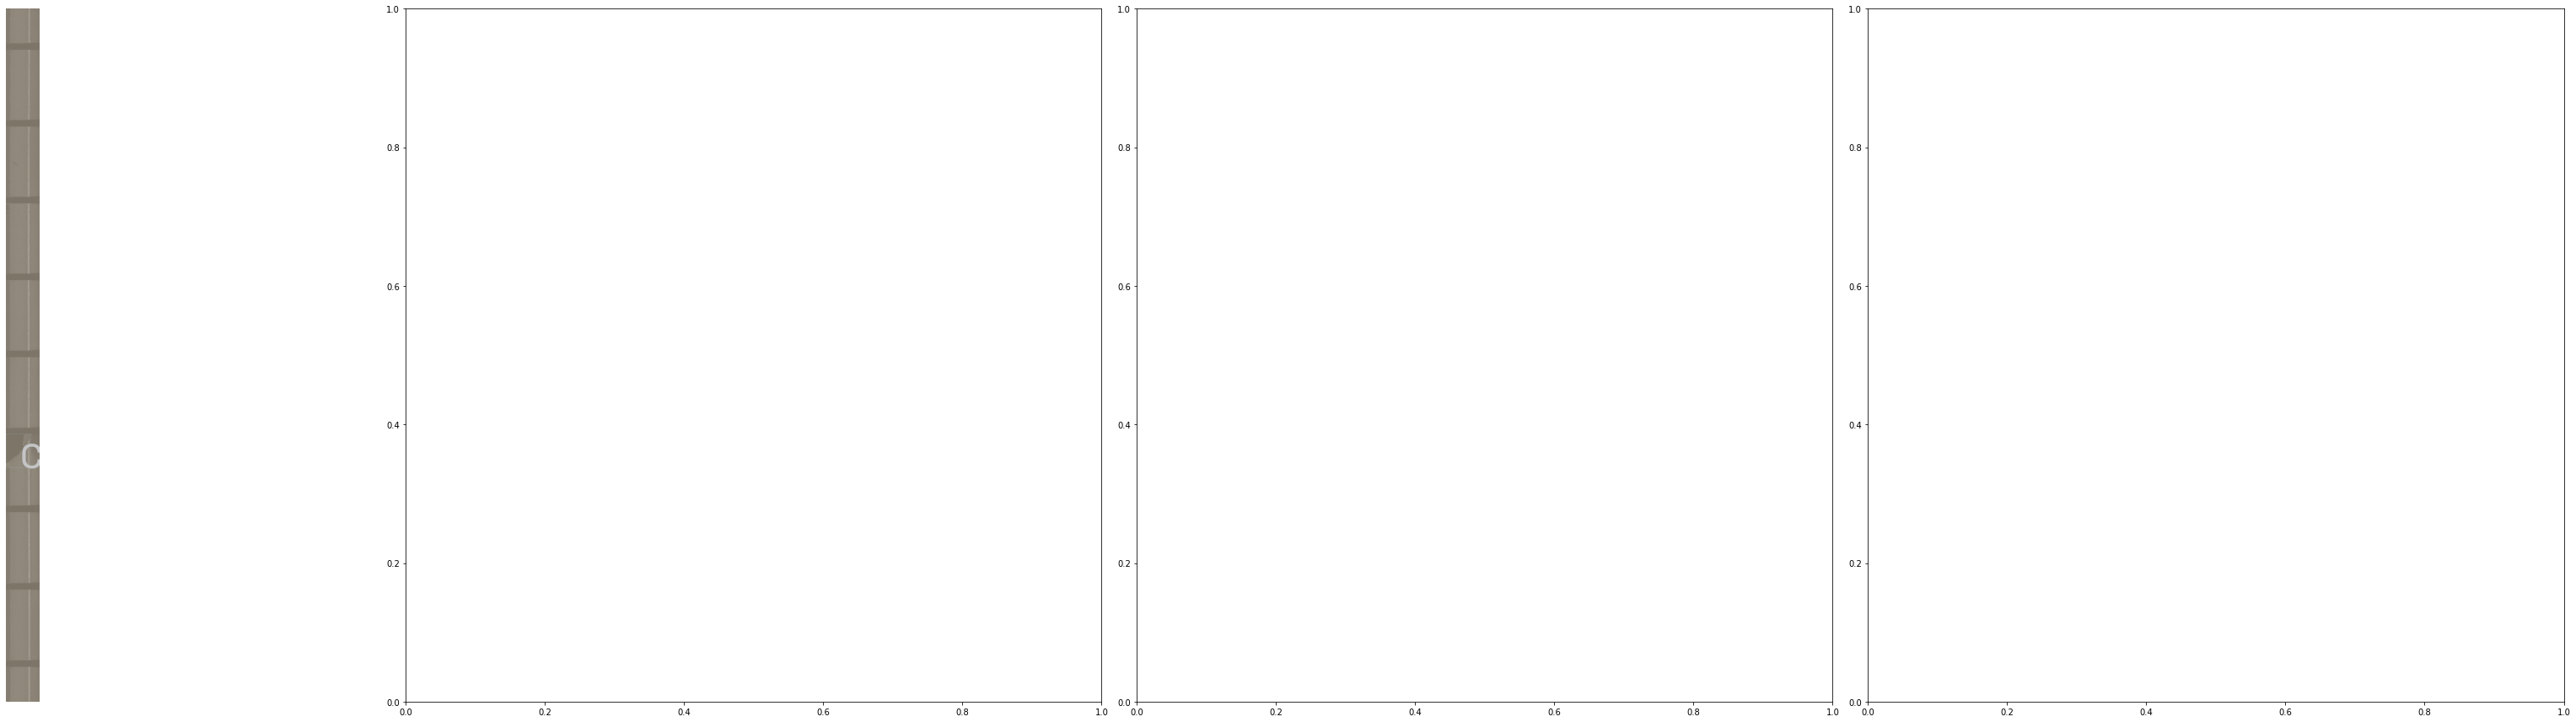

In [20]:
# show batch
model_type.show_batch(first(valid_dl), ncols=4)

In [21]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

### Training using fastai

In [22]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

/usr/local/lib/python3.9/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.9/dist-packages/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  warnings.warn(


SuggestedLRs(valley=9.120108734350652e-05)

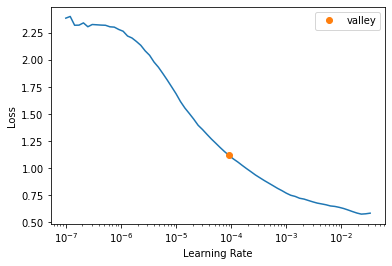

In [23]:
learn.lr_find()

# For Sparse-RCNN, use lower `end_lr`
# learn.lr_find(end_lr=0.005)

In [24]:
learn.fine_tune(20, 0.00158, freeze_epochs=1)

epoch,train_loss,valid_loss,COCOMetric,time
0,0.670801,0.393446,0.295875,00:03


epoch,train_loss,valid_loss,COCOMetric,time
0,0.308196,0.151504,0.551485,00:04
1,0.219877,0.104681,0.400000,00:04
2,0.176747,0.133443,0.750495,00:04
3,0.156473,0.105851,0.700000,00:04
4,0.149758,0.114971,0.500000,00:04
5,0.140898,0.150469,0.250495,00:04
6,0.135385,0.088656,0.800000,00:04
7,0.126543,0.099996,0.700000,00:04
8,0.119326,0.082790,0.600000,00:04
9,0.110400,0.070148,0.750495,00:04


### Training using Pytorch Lightning

In [25]:
class LightModel(model_type.lightning.ModelAdapter):
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=1e-4)
    
light_model = LightModel(model, metrics=metrics)

In [26]:
trainer = pl.Trainer(max_epochs=5, gpus=1)
trainer.fit(light_model, train_dl, valid_dl)

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:445: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | FasterRCNN | 60.3 M
-------------------------------------
60.1 M    Trainable params
225 K     Non-trainable params
60.3 M    Total params
241.361   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:219: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/data.py:86: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:219: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `Da

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


#### Testing using Pytorch Lightning
For testing, it is recommended to use a separate test dataset that the model did not see during training but for demonstration purposes we'll re-use the validation dataset.

In [27]:
trainer = pl.Trainer()
trainer.test(light_model, valid_dl)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/trainer.py:1766: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


MisconfigurationException: No `test_step()` method defined to run `Trainer.test`.

## Using the model - inference and showing results

The first step in reviewing the model is to show results from the validation dataset. This is easy to do with the `show_results` function.

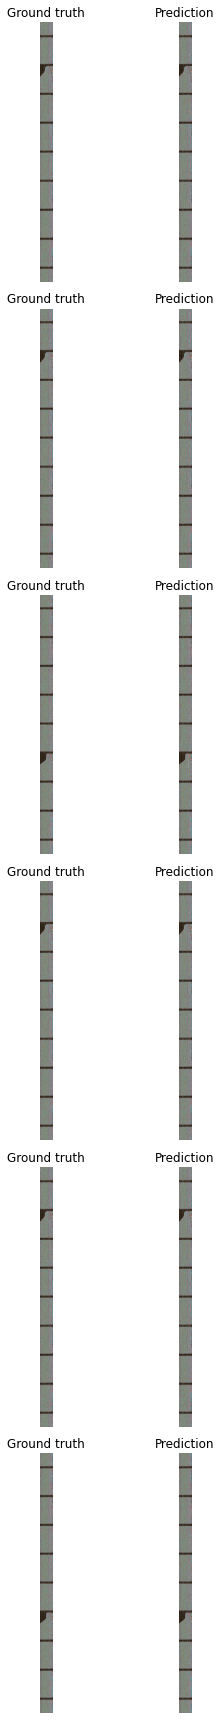

In [28]:
model_type.show_results(model, valid_ds, detection_threshold=.5)

### Prediction

Sometimes you want to have more control than `show_results` provides. You can construct an inference dataloader using `infer_dl` from any IceVision dataset and pass this to `predict_dl` and use `show_preds` to look at the predictions.

A prediction is returned as a dict with keys: `scores`, `labels`, `bboxes`, and possibly `masks`. 

Prediction functions that take a `detection_threshold` argument will only return the predictions whose score is above the threshold.

Prediction functions that take a `keep_images` argument will only return the (tensor representation of the) image when it is `True`. In interactive environments, such as a notebook, it is helpful to see the image with bounding boxes and labels applied. In a deployment context, however, it is typically more useful (and efficient) to return the bounding boxes by themselves.



> NOTE: For a more detailed look at inference check out the [inference tutorial](https://airctic.com/dev/inference/)

In [29]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=4, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/1 [00:00<?, ?it/s]

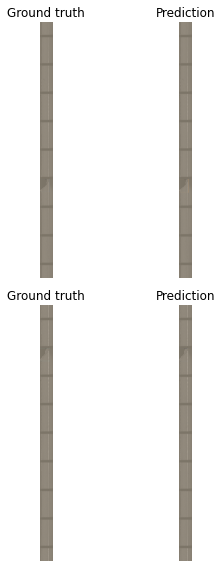

In [30]:
show_preds(preds=preds[:4])